In [59]:
import pandas as pd
import numpy as np


In [105]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [71]:
train.head().columns.tolist()

['Unnamed: 0',
 'NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR

In [72]:
train = train[["NU_INSCRICAO","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","TP_PRESENCA_MT","TP_PRESENCA_CH","TP_PRESENCA_LC","TP_PRESENCA_CN"]]
train.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_CN
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,436.3,495.4,581.2,399.4,520.0,1,1,1,1
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,474.5,544.1,599.0,459.8,580.0,1,1,1,1
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN,NaN,NaN,NaN,0,0,0,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [73]:
train.loc[train.TP_PRESENCA_CH == 0,"NU_NOTA_REDACAO"]= 0
train.loc[train.TP_PRESENCA_CH == 0,"NU_NOTA_CH"]= 0
train.loc[train.TP_PRESENCA_LC == 0, "NU_NOTA_LC"]= 0
train.loc[train.TP_PRESENCA_MT == 0,"NU_NOTA_MT"]= 0
train.loc[train.TP_PRESENCA_CN == 0,"NU_NOTA_CN"]= 0

In [74]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='median')
train_fit = impute.fit(train.iloc[:,1:6])
train.iloc[:,1:6] = train_fit.transform(train.iloc[:,1:6])

In [75]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [76]:
x = train[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO"]]
y = train[["NU_NOTA_MT"]]

In [77]:
modelo.fit(x,y)

LinearRegression()

In [79]:
score = modelo.score(x,y)

ValueError: x and y must be the same size

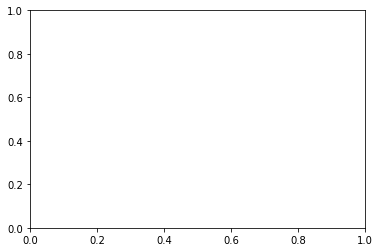

In [80]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

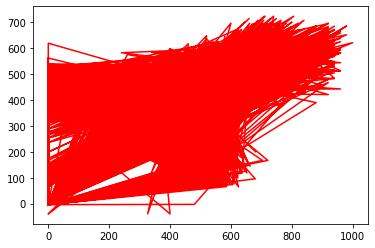

In [82]:
plt.plot(x, modelo.predict(x), color = 'red')

In [83]:
print(modelo.coef_)

[[ 0.35595234 -0.11229212  0.72650694  0.00225628]]


In [106]:
test = test[["NU_INSCRICAO","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO","TP_PRESENCA_CH","TP_PRESENCA_LC","TP_PRESENCA_CN"]]

In [107]:
test.loc[test.TP_PRESENCA_CH == 0,"NU_NOTA_REDACAO"]= 0
test.loc[test.TP_PRESENCA_CH == 0,"NU_NOTA_CH"]= 0
test.loc[test.TP_PRESENCA_LC == 0, "NU_NOTA_LC"]= 0
test.loc[test.TP_PRESENCA_CN == 0,"NU_NOTA_CN"]= 0

In [108]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='median')
test_fit = impute.fit(test.iloc[:,1:5])
test.iloc[:,1:5] = test_fit.transform(test.iloc[:,1:5])

In [109]:
test.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_CN
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0,1,1,1
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0,1,1,1
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0,1,1,1
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.0,0.0,0.0,0.0,0,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0,1,1,1


In [114]:
x_test = test[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_REDACAO"]]


In [116]:
y_test = modelo.predict(x_test)

In [130]:
new = pd.DataFrame(np.round(y_test,1),columns = ["mat"])

In [131]:
new.head()

,mat
0,426.4
1,479.6
2,584.8
3,-3.9
4,567.7


In [133]:
new.to_csv('out.csv',index=False)

In [132]:
new.loc[new.mat < 0,"mat"]= 0